In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv")

df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index(['Month'])

df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [2]:
import pmdarima as pm

# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(df, test_size=0.2, shuffle=False)

# model = ARIMA(endog=train['eur_usd'], order=(1,1,1))
# model = model.fit()
# predictions = model.forecast(steps=len(test))

model = pm.auto_arima(df[['#Passengers']], test='adf', m=12)
model

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [3]:
n_periods = 24

pred, pred_ranges = model.predict(
    n_periods=n_periods, 
    return_conf_int=True,
)

pred[::-5]

1962-12-01    499.858481
1962-07-01    688.437307
1962-02-01    454.177037
1961-09-01    540.883864
1961-04-01    491.840023
Freq: -5MS, dtype: float64

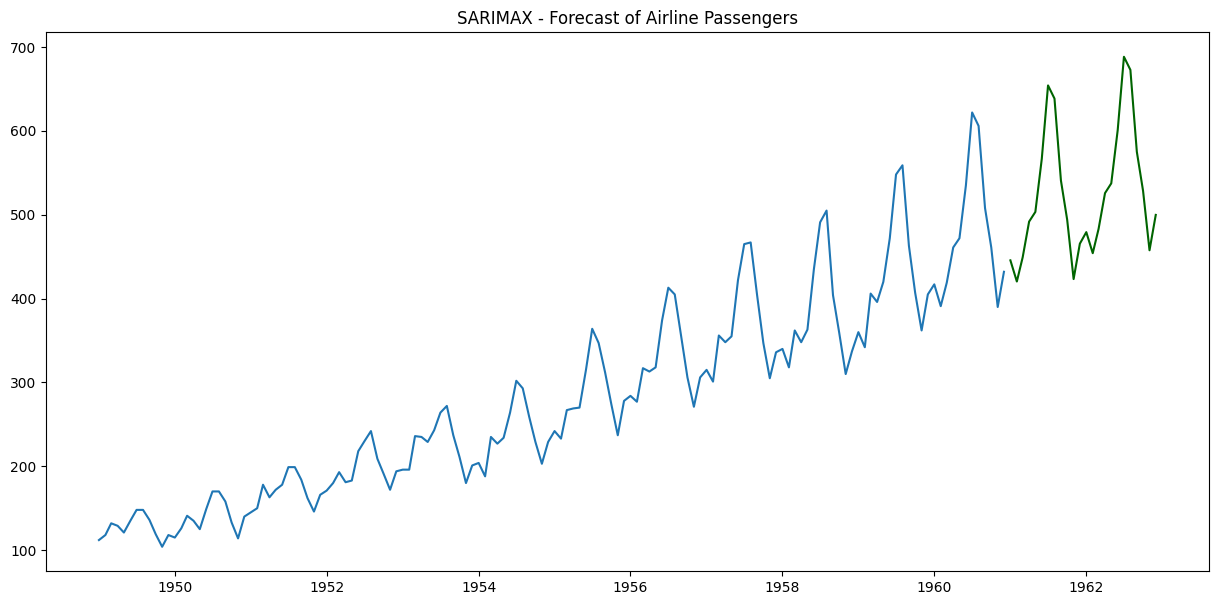

In [4]:
import matplotlib.pylab as plt

index_of_fc = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='MS')
pred_series = pd.Series(pred, index=index_of_fc)

plt.figure(figsize=(15, 7))
plt.plot(df["#Passengers"], color='#1f76b4')
plt.plot(pred_series, color='darkgreen')
plt.title("SARIMAX - Forecast of Airline Passengers")
plt.show()